<a href="https://colab.research.google.com/github/laura314159265/poly/blob/main/PR%C3%80CTICA_GUIADA/P1_EULER_IMPLICIT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Volem trobar els valors de les temperatures de la següent forma:

$\vec{T_i}=M^{-1}(\vec{T_{i-1}}+\vec{\Delta t})$


In [19]:
import numpy as np
from numpy.linalg import inv
from scipy.linalg import toeplitz
import matplotlib.pyplot as plt
import matplotlib.patches as pt


# CÀLCULS PREVIS
# Recordem que les nostres dades són
C_v= 3686
rho= 1081
kappa= 0.56
sigma= 0.472
volts= 40
# Amb aquests, calculem la difusivitat, que farem servir per a la normalització
alpha= kappa/(C_v*rho)
# Imposem la nostra normalització
N= 101
x_0= 0.02 # Triat per tal de normalitzar x_f, que ha de ser 0.02 m (2 cm)
x_f= 0.02/x_0
t_0= x_0**2/alpha # \tilde{t}=t/t_0
t_f= 0.025 # Ja està normalitzat, ho diu l'enunciat
P_ext= volts**2*sigma/(2*(x_0)**2) # Calculada per anàlisi dimensional a partir de dades proporcionades, el factor 2 dividint és perquè s'ha d'agafar el voltatge efectiu
T_0= P_ext/(C_v*rho)*t_0 # Unitats=Kelvin
print("T_0=", T_0)
T_init= 309.65/T_0 # Hem passat la temperatura inicial 36.5℃ a kelvin i després l'hem normalitzat

# Definim els dos casos de variacions de les variables
dx= x_f/(N-1) # Com tenim N punts, tenim N-1 intervals
dt_1= dx**2
dt_2= 0.5*dx**2

# Creem una funció aplicable a qualsevol temperatura inicial (sempre que sigui la mateixa temperatura que als contorns),
def Euler_implicit (T_i, t_f, dx, dt): # Li has de passar les variables (escalars) normalizades
    T_i_vec=np.ones((N,1))*T_i
    i= 1
    t_i= 0
    # Creem la matriu M
    gamma= dt/(dx**2)
    col1= [0]*(N)
    col1[0]= 1+2*gamma
    col1[1]= 1-2*gamma
    fila1= [0]*(N)
    fila1[1]= -gamma
    matriu = toeplitz(col1, fila1)
    #IMPOSEM LES CONDICIONS DE CONTORN
    matriu[0,:]  = 0 #això vol dir que tots els elements (:) de la primera fila (la fila 0, corresponent al temps inicial t=0) valen 0
    matriu[0,0]  = 1 #i després de fer que tots els elements valguin 0 fas que el primer (el de la primera fila i la primera columna
                          #és a dir, el primer de la diagonal) valgui 1, de forma que quan multipliques la matriu per T_inic et continua
                          #quedant T_inic
    matriu[-1,:] = 0 #el mateix que abans, fas que tots els elements de la última fila siguin 0 excepte el de l'última columna, és a dir,
                          #l'últim de la diagonal, el qual val 1
    matriu[-1,-1]= 1



    while t_i<t_f: #com la nostra equació és de la forma Ax=b, on A=inv(M) i x=\vec{T_i}, anem a trobar b=\vec{T_{i-1}+∆t}
      # I apliquem això per trobar T_i_vec
      b = T_i_vec + np.ones((N,1))*dt
      b[0]  = T_i
      b[-1] = T_i

      T_i_vec = np.matmul(inv(matriu), b)
      T_i_vec[0]  = T_i
      T_i_vec[-1] = T_i

      t_i = t_i + dt
      i = i + 1
    print("amb un dt=",dt,", calen",i,"iteracions per arribar al temps normalitzat", t_i)
    return T_i_vec

# Apliquem la funció que hem creat als nostres dos casos de discretitzacions
T_i_1 = Euler_implicit(T_init, t_f, dx, dt_1)
T_i_2 = Euler_implicit(T_init, t_f, dx, dt_2)

# Temperatures reals, desfem la normalització i passem a ℃
T_real_1 = T_i_1 * T_0 - 273.15
T_real_2 = T_i_2 * T_0 - 273.15

print(T_real_1)
print(T_real_2)

T_0= 674.2857142857143
amb un dt= 0.0001 , calen 252 iteracions per arribar al temps normalitzat 0.025099999999999904
amb un dt= 5e-05 , calen 501 iteracions per arribar al temps normalitzat 0.025000000000000203
[[36.5       ]
 [37.67139282]
 [38.77776102]
 [39.82150371]
 [40.8050104 ]
 [41.73065623]
 [42.60079732]
 [43.41776624]
 [44.18386761]
 [44.90137383]
 [45.57252107]
 [46.19950538]
 [46.78447907]
 [47.32954737]
 [47.83676524]
 [48.30813458]
 [48.74560159]
 [49.1510545 ]
 [49.52632156]
 [49.87316933]
 [50.19330124]
 [50.48835643]
 [50.75990891]
 [51.00946696]
 [51.23847278]
 [51.44830242]
 [51.64026594]
 [51.81560777]
 [51.97550727]
 [52.12107951]
 [52.25337619]
 [52.37338671]
 [52.48203936]
 [52.58020264]
 [52.66868663]
 [52.74824445]
 [52.81957376]
 [52.88331825]
 [52.94006922]
 [52.99036701]
 [53.03470254]
 [53.0735187 ]
 [53.1072117 ]
 [53.13613237]
 [53.16058731]
 [53.18083998]
 [53.19711163]
 [53.20958214]
 [53.21839069]
 [53.22363633]
 [53.22537829]
 [53.22363633]
 [53.218

ARA A GRAFICAR AIXÒ I COMPARAR ELS DOS CASOS DE dt AMB LA SOLUCIÓ ANALÍTICA

/tmp/ipython-input-1008144242.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  lim_inf_y= float(np.floor(min(T_real_1)))
/tmp/ipython-input-1008144242.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  altura= float(np.floor(max(T_real_1)+1)-np.floor(min(T_real_1)))


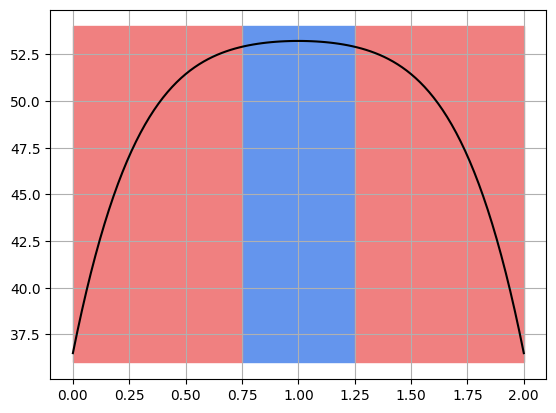

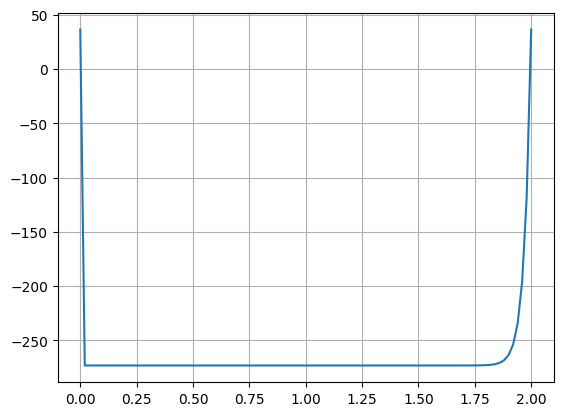

In [20]:
dx_llista=np.linspace(0, 2, 101)

lim_inf_y= float(np.floor(min(T_real_1)))
altura= float(np.floor(max(T_real_1)+1)-np.floor(min(T_real_1)))

fig, fig1= plt.subplots()

rectangle_cor= pt.Rectangle((0.75, lim_inf_y), 0.5, altura, color="cornflowerblue", alpha=1)
rectangle_esq= pt.Rectangle((0, lim_inf_y), 0.75, altura, color="lightcoral", alpha=1)
rectangle_dre= pt.Rectangle((1.25, lim_inf_y), 0.75, altura, color="lightcoral", alpha=1)

fig1.add_patch(rectangle_cor)
fig1.add_patch(rectangle_esq)
fig1.add_patch(rectangle_dre)

plt.plot(dx_llista, T_real_1, color="k")
plt.grid()
plt.show()

fig, fig2= plt.subplots()

rectangle_cor= pt.Rectangle((0.75, lim_inf_y), 0.5, altura, color="cornflowerblue", alpha=1)
rectangle_esq= pt.Rectangle((0, lim_inf_y), 0.75, altura, color="lightcoral", alpha=1)
rectangle_dre= pt.Rectangle((1.25, lim_inf_y), 0.75, altura, color="lightcoral", alpha=1)

fig1.add_patch(rectangle_cor)
fig1.add_patch(rectangle_esq)
fig1.add_patch(rectangle_dre)

plt.plot(dx_llista, T_real_2)
plt.grid()
plt.show()